In [18]:
import pandas as pd 
import numpy as np

from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import xgboost as xgb
import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sb

In [2]:
df = pd.read_csv('../Microsoft-Malware-Challenge/Dataset/train/LargeTrain.csv')

In [3]:
df

,Virtual,Offset,loc,Import,Imports,var,Forwarder,UINT,LONG,BOOL,...,Img99,Img100,Img101,Img102,Img103,Img104,Img105,Img106,Img107,Class
0,3,3,689,18,6,890,6,39,17,88,...,35148.0,8687.0,55835.0,9078.0,21355.0,56302.0,10380.0,171979.0,162674.0,2
1,3,3,583,15,5,1574,5,6,7,30,...,571.0,718.0,1762.0,642.0,1820.0,1675.0,1100.0,7702.0,6551.0,8
2,3,4,2796,15,5,625,5,58,11,152,...,29872.0,16910.0,31708.0,9000.0,17586.0,30719.0,30062.0,55331.0,12946.0,9
3,3,3,373,27,9,615,9,16,10,34,...,10742.0,9755.0,26992.0,9069.0,24885.0,27108.0,13219.0,122247.0,98621.0,9
4,3,3,77,12,4,66,4,3,0,5,...,962.0,1307.0,3119.0,1172.0,3522.0,3245.0,2001.0,15501.0,11864.0,1
5,3,3,86,6,2,6,2,0,0,1,...,474.0,561.0,1389.0,581.0,1537.0,1293.0,1275.0,7048.0,6164.0,6
6,3,3,469,21,7,291,7,43,15,82,...,33452.0,15370.0,63663.0,15581.0,42067.0,63996.0,21127.0,221716.0,176170.0,2
7,3,3,2090,21,7,4035,7,17,8,40,...,1378.0,1901.0,4588.0,2004.0,5550.0,4494.0,2803.0,21692.0,18786.0,2
8,3,3,691,18,6,597,6,30,16,61,...,43370.0,13748.0,66715.0,14946.0,39350.0,71793.0,18663.0,219223.0,167493.0,2
9,6,6,229,0,8,526,0,11,1,13,...,1031.0,1076.0,3040.0,1097.0,3216.0,2985.0,1577.0,12860.0,6860.0,6


In [4]:
#extract all columns name
col_name = list(df.columns.values)[:1804]

#Generate feature and target array
feature = df[col_name].values
target = df['Class'].values

In [5]:
xgb_clf = xgb.XGBClassifier()

In [6]:
%%time
gbm = xgb_clf.fit(feature, target)

CPU times: user 11min 37s, sys: 1.98 s, total: 11min 39s
Wall time: 3min 13s


In [35]:
gbm_predict = gbm.predict(feature)

In [30]:
gbm_proba = gbm.predict_proba(feature)

In [33]:
target

array([2, 8, 9, ..., 4, 4, 4])

In [36]:
metrics.accuracy_score(target, gbm_predict)

1.0

In [7]:
%%time
param_test1 = {
 'max_depth':range(3,8,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier(), 
     param_grid = param_test1)
gsearch1.fit(feature, target)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

CPU times: user 4h 45min 46s, sys: 20.3 s, total: 4h 46min 6s
Wall time: 1h 12min 57s


In [9]:
print gsearch1.grid_scores_

[mean: 0.99604, std: 0.00086, params: {'max_depth': 3, 'min_child_weight': 1}, mean: 0.99604, std: 0.00128, params: {'max_depth': 3, 'min_child_weight': 3}, mean: 0.99614, std: 0.00126, params: {'max_depth': 3, 'min_child_weight': 5}, mean: 0.99641, std: 0.00103, params: {'max_depth': 5, 'min_child_weight': 1}, mean: 0.99678, std: 0.00094, params: {'max_depth': 5, 'min_child_weight': 3}, mean: 0.99632, std: 0.00094, params: {'max_depth': 5, 'min_child_weight': 5}, mean: 0.99604, std: 0.00114, params: {'max_depth': 7, 'min_child_weight': 1}, mean: 0.99650, std: 0.00116, params: {'max_depth': 7, 'min_child_weight': 3}, mean: 0.99641, std: 0.00103, params: {'max_depth': 7, 'min_child_weight': 5}]


In [10]:
print gsearch1.best_params_

{'max_depth': 5, 'min_child_weight': 3}


In [20]:
gsearch1.param_grid['max_depth']

[3, 5, 7]

In [21]:
gsearch1.param_grid['min_child_weight']

[1, 3, 5]

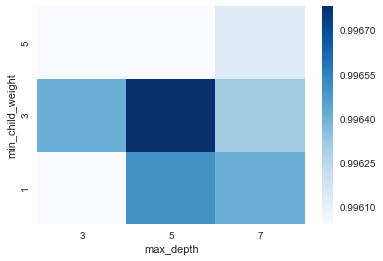

In [23]:
gsearch1.best_score_
grid_visualization = []

for grid_pair in gsearch1.grid_scores_:
    grid_visualization.append(grid_pair.mean_validation_score)
    
grid_visualization = np.array(grid_visualization)
grid_visualization.shape = (3, 3)
sb.heatmap(grid_visualization, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, gsearch1.param_grid['max_depth'])
plt.yticks(np.arange(3) + 0.5, gsearch1.param_grid['min_child_weight'])
plt.xlabel('max_depth')
plt.ylabel('min_child_weight')

In [24]:
gbm.score(feature, target)

1.0

In [25]:
feature_importance = gbm.feature_importances_

In [26]:
feature_rank = sorted(zip(map(lambda x: round(x, 5), feature_importance), col_name), reverse=True)
feature_rank[:10]

[(0.05955, 'section_names_header'),
 (0.03798, 'Offset.1'),
 (0.01735, 'Entropy'),
 (0.01571, 'dc_por'),
 (0.01571, 'DATA'),
 (0.01477, 'ent_q_diffs_max'),
 (0.01454, 'VirtualAlloc'),
 (0.0143, 'TB_00'),
 (0.01336, 'DllEntryPoint'),
 (0.01266, 'asm_commands_jnb')]

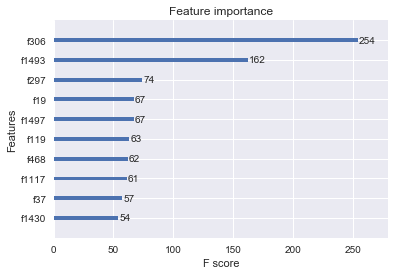

In [41]:
xgb.plot_importance(gbm, max_num_features=10)